In [30]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

In [31]:
tiradas = 100
caras = 60
secas = 40

La probabilidad de que p se ajuste a los datos sería claramente una binomial de k=60 y n=100

In [32]:
def likelihood(p,k,n):
    bin = sp.comb(n,k)*(p**k)*((1-p)**(n-k))
    return bin

Los priors:

In [33]:
bordeinferr = 0
bordesuperr = 1

In [34]:
def priors(p):
	for i in range(len(p)):
		if bordeinferr <= p[i] and p[i] <= bordesuperr:
			return 0
		else:
			return -np.inf
	

def post(p,k,n):
	prior_prob = priors(p)
	return likelihood(p,k,n) + prior_prob


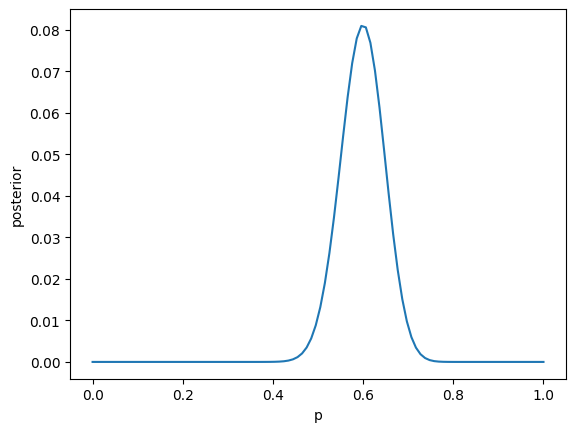

In [35]:
p = np.linspace(0,1,100)

posterior = post(p,caras,tiradas)

plt.plot(p,posterior)
plt.xlabel('p')
plt.ylabel('posterior')
plt.show()

Ahora con prior gaussiano

In [36]:
def gaussprior(p):
				mu = 0.5
				sigma = 0.1
				for i in range(len(p)):
					return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-0.5*((p-mu)/sigma)**2)

def gausspost(p,k,n):
	prior_prob = gaussprior(p)
	return likelihood(p,k,n) + prior_prob
				

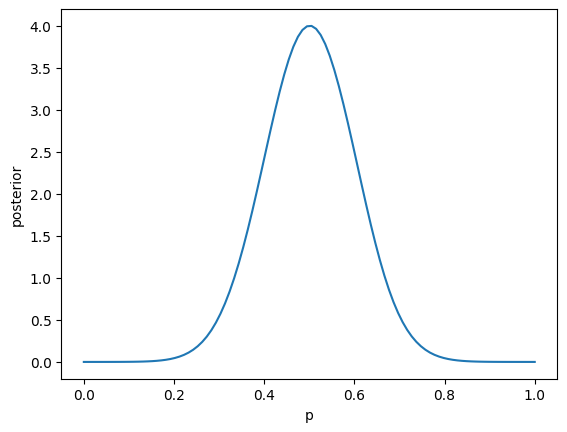

In [37]:
posteriorgaussiana = gausspost(p,caras, tiradas)

plt.plot(p,posteriorgaussiana)
plt.xlabel('p')
plt.ylabel('posterior')
plt.show()

Ahora, combinamos los gráficos, normalizamos antes para que de coherente.

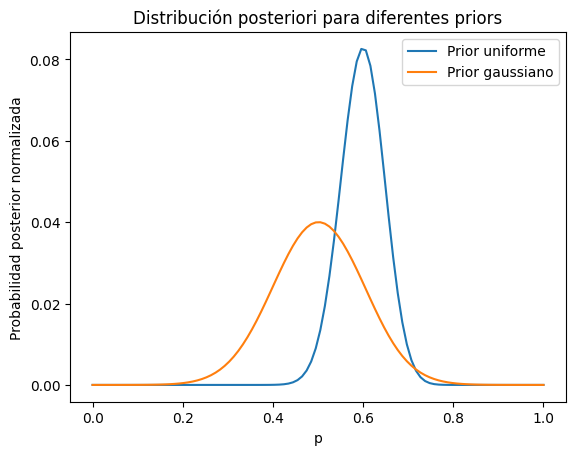

In [38]:
posterior_normalizada = posterior/np.sum(posterior)
posteriorgaussiana_normalizada = posteriorgaussiana/np.sum(posteriorgaussiana)

plt.plot(p,posterior_normalizada, label = 'Prior uniforme')
plt.plot(p,posteriorgaussiana_normalizada, label = 'Prior gaussiano')
plt.xlabel('p')
plt.ylabel('Probabilidad posterior normalizada')
plt.legend()
plt.title('Distribución posteriori para diferentes priors')
plt.show()

In [44]:
numerito_max_uniforme = np.argmax(posterior_normalizada)
numerito_max_gauss = np.argmax(posteriorgaussiana_normalizada)

max_uniforme = p[numerito_max_uniforme]
max_gauss = p[numerito_max_gauss]

print('El valor de p que maximiza la probabilidad posterior con prior uniforme es: ', max_uniforme)
print('El valor de p que maximiza la probabilidad posterior con prior gaussiano es: ', max_gauss)

El valor de p que maximiza la probabilidad posterior con prior uniforme es:  0.595959595959596
El valor de p que maximiza la probabilidad posterior con prior gaussiano es:  0.5050505050505051
